# KH Instability

### Things we need:
* [Richardson # ](https://en.wikipedia.org/wiki/Richardson_number) Function of Density and Velocity
* Some Definitions:
  * Wave Number (k) is the # of wavelengths per unit distance ($k = \frac{1}{\lambda}$)
  * Wave Length (𝜆) is the distance between two peaks
  * Phase Velocity (c) is the Speed of the Group of waves
  * Frequency (⍵) is the number of waves per unit time
  * $\omega = \frac{c}{\lambda}$
  * $c=\frac{\rho_2 U_2 + \rho_1 U_1}{\rho_2+\rho_1} \pm [\frac{\rho_2-\rho_1}{\rho_2+\rho_1}\frac{g}{k}-\frac{\rho_2 \rho_1}{\rho_2 + \rho_1}(U_2-U_1)^2]^{1/2}  = \frac{\omega}{k}$   
  * Richardson Number (Ri) is a unitless dimension that relates velocity and density 
  * $Ri = \frac{g}{\rho}\frac{\delta \rho / \delta z}{(\delta u / \delta z)^2}$ , where z is the height of the water column
    * https://en.wikipedia.org/wiki/Boussinesq_approximation_(buoyancy)#Advantages
* https://teos-10.github.io/GSW-Python/intro.html


In [1]:
import numpy as np
from matplotlib import pyplot as plt
# from gsw.density import rho_t_exact as density
import pandas as pd

In [2]:
def frequency(c:float, wavelength: float) -> float:
    return c / wavelength

def wave_number(wavelength: float) -> float:
    return 1 / wavelength

def wave_number_from_freq(w: float, c: float) -> float:
    return w/c

def wavelength(k: float) -> float:
    return 1/k

def richardson_number(g: float, rho_1: float, rho_2: float, d_u: float, dz: float) -> float:
    return (g/rho_2) * ((rho_2 - rho_1)/dz)/(d_u/dz)**2

def phase_velocity_du(g: float, rho_1: float, rho_2: float, du: float, k: float) -> float:
    u = du/2
    left_side = (rho_2*u + rho_1*u)/(rho_2 + rho_1) 
    right_side = np.sqrt(((rho_2 - rho_1)/(rho_2+rho_1))*(g/k) - ((rho_2*rho_1)/(rho_2+rho_1)) * (d_u)**2)
    # return (left_side + right_side, left_side - right_side)
    return left_side + right_side

def phase_velocity_omega(w: float, k: float) -> float:
    return w/k


In [3]:
# # Some Calculations
# def density_from_salinity(percent_salinity: float) -> float:
#     return density(percent_salinity * 10, 23.0, 0)

In [4]:
# Define Constants
g = 9.8 # Acceleration due to gravity (9.8 m/s^2)

In [5]:
# Wavelengths, Densities, Velocities
salinities = np.array([0.035, 0.095, 0.15])
observed_wavelength = np.array([2.286 * 0.01, 1.778 * 0.01, 1.524*0.01])
experimental_wavenumber = wave_number(observed_wavelength)
densities = np.array([997.80679621, 998.25999037, 998.67439155])
observed_us= np.array([0.035, 0.05, 0.06])

In [6]:
densities

array([997.80679621, 998.25999037, 998.67439155])

In [7]:
experimental_wavenumber

array([43.74453193, 56.24296963, 65.6167979 ])

In [8]:
dz = 0.1905 # Height of tank
dus = 2*observed_us # since U_2 = -U1

In [9]:
ris = richardson_number(g, 997.17, densities, dus, dz)

In [10]:
data = {'Salinity (%)': salinities*100, 'Delta Rho': densities - 997.17, 'Delta U': dus, 'Richardson Number': ris, 'Wave Number': experimental_wavenumber, 'Wave Lengths': observed_wavelength}
df = pd.DataFrame(data)
df

,Salinity (%),Delta Rho,Delta U,Richardson Number,Wave Number,Wave Lengths
0,3.5,0.636796,0.07,0.243153,43.744532,0.02286
1,9.5,1.089990,0.10,0.203845,56.242970,0.01778
2,15.0,1.504392,0.12,0.195297,65.616798,0.01524


In [15]:
print(df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & Salinity (%) & Delta Rho & Delta U & Richardson Number & Wave Number & Wave Lengths \\
\midrule
0 & 3.500000 & 0.636796 & 0.070000 & 0.243153 & 43.744532 & 0.022860 \\
1 & 9.500000 & 1.089990 & 0.100000 & 0.203845 & 56.242970 & 0.017780 \\
2 & 15.000000 & 1.504392 & 0.120000 & 0.195297 & 65.616798 & 0.015240 \\
\bottomrule
\end{tabular}



In [12]:
import matplotlib

matplotlib.rcParams.update({'font.size': 22})

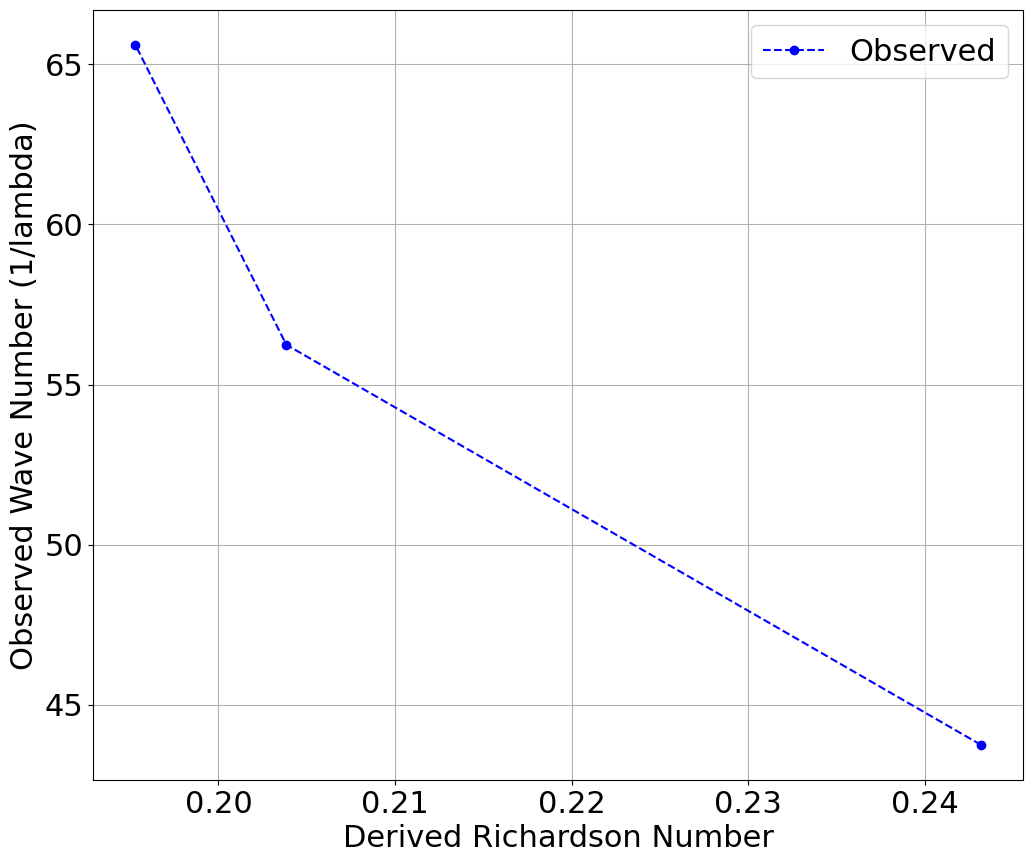

In [13]:
plt.figure(figsize=(12,10))
plt.plot(ris, experimental_wavenumber, 'o--b',label='Observed')
plt.grid()
# plt.plot(data['t'], h(data['t'], r_h, h_0, r_p, C), label='Predicted ODE: r_h = 0.001', color='red')
plt.legend()
plt.ylabel('Observed Wave Number (1/lambda)')
plt.xlabel('Derived Richardson Number')
plt.savefig('RivsK.png') 